In [1]:
import os

N_THREADS = "4"
os.environ["OMP_NUM_THREADS"] = N_THREADS
os.environ["OPENBLAS_NUM_THREADS"] = N_THREADS
os.environ["MKL_NUM_THREADS"] = N_THREADS
os.environ["VECLIB_MAXIMUM_THREADS"] = N_THREADS
os.environ["NUMEXPR_NUM_THREADS"] = N_THREADS

In [2]:
import gEconpy as ge
import gEconpy.plotting as gp

import pymc as pm
import preliz as pz
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
gcn_file = "../GCN Files/RBC_two_household_additive.gcn"
mod = ge.model_from_gcn(gcn_file)

Model Building Complete.
Found:
	18 equations
	18 variables
		The following variables were eliminated at user request:
			TC_t, U_NR_t, U_R_t
		The following "variables" were defined as constants and have been substituted away:
			mc_t
	4 stochastic shocks
		 0 / 4 has a defined prior. 
	12 parameters
		 12 / 12 parameters has a defined prior. 
	0 parameters to calibrate.
Model appears well defined and ready to proceed to solving.



In [4]:
ss_res = mod.steady_state()

In [5]:
ge.check_bk_condition(mod, steady_state=ss_res);

Model solution has 3 eigenvalues greater than one in modulus and 3 forward-looking variables. 
Blanchard-Kahn condition is satisfied.


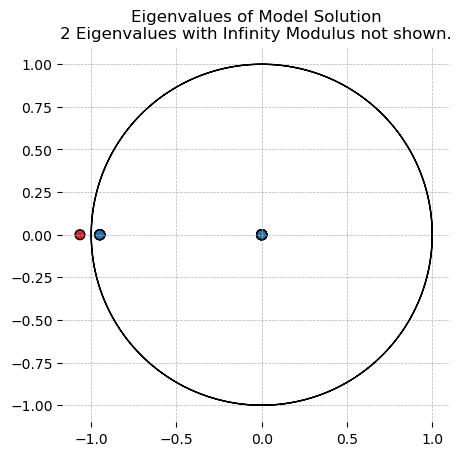

In [6]:
gp.plot_eigenvalues(mod);

In [7]:
T, R = mod.solve_model(omega=0.75)

Solution found, sum of squared residuals: 0.000000000
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000


In [8]:
import numpy as np

ge.matrix_to_dataframe(T, mod).round(3).replace({0: np.nan}).dropna(
    how="all", axis=1
).fillna(0)

,K,TFP,Theta_N,Theta_R,shock_beta_R
C,0.388,0.362,-0.123,-0.112,0.259
C_NR,0.388,0.362,-0.598,0.363,0.259
C_R,0.388,0.362,0.035,-0.270,0.259
I,-1.622,6.148,-0.011,-3.985,-3.952
K,0.948,0.123,0.000,-0.080,-0.079
L,-0.661,1.165,-0.150,-1.558,-1.109
L_NR,-0.194,-0.181,-0.651,-0.182,-0.129
L_R,-0.857,1.728,0.060,-2.134,-1.519
TFP,0.000,0.950,0.000,0.000,0.000
Theta_N,0.000,0.000,0.950,0.000,0.000


In [9]:
ge.matrix_to_dataframe(R, mod).round(3).replace({0: np.nan}).dropna(
    how="all", axis=1
).fillna(0)

,epsilon_TFP,epsilon_Theta_N,epsilon_Theta_R,epsilon_beta_R
C,0.381,-0.130,-0.117,0.272
C_NR,0.381,-0.630,0.383,0.272
C_R,0.381,0.037,-0.284,0.272
I,6.472,-0.012,-4.195,-4.160
K,0.129,0.000,-0.084,-0.083
L,1.226,-0.158,-1.639,-1.167
L_NR,-0.190,-0.685,-0.191,-0.136
L_R,1.819,0.063,-2.246,-1.599
TFP,1.000,0.000,0.000,0.000
Theta_N,0.000,1.000,0.000,0.000


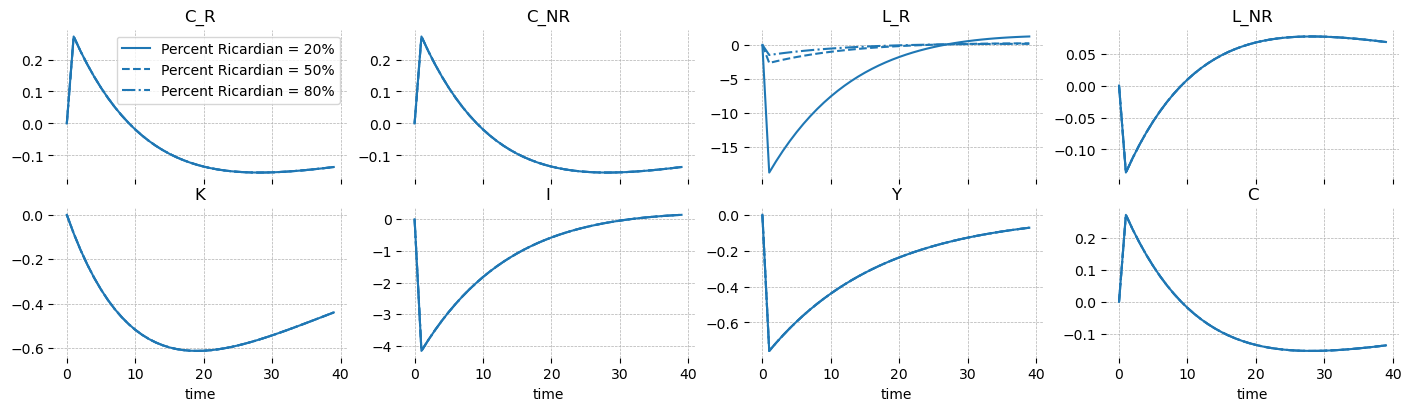

In [10]:
gp.plot_irf(
    {
        f"Percent Ricardian = {omega:0.0%}": ge.impulse_response_function(
            mod,
            shock_size={"epsilon_beta_R": 1.0},
            verbose=False,
            omega=omega,
            #             steady_state_kwargs={"how": "root", "verbose": False, "progressbar": False},
        )
        for omega in [0.2, 0.5, 0.8]
    },
    ["C_R", "C_NR", "L_R", "L_NR", "K", "I", "Y", "C"],
    figsize=(14, 4),
);

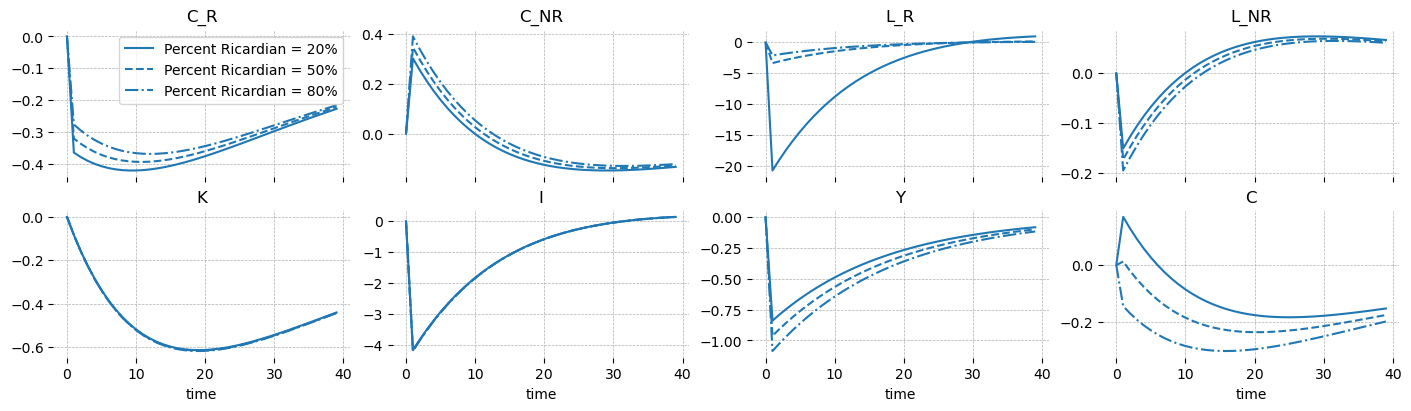

In [11]:
gp.plot_irf(
    {
        f"Percent Ricardian = {omega:0.0%}": ge.impulse_response_function(
            mod,
            shock_size={"epsilon_Theta_R": 1.0},
            verbose=False,
            omega=omega,
            #             steady_state_kwargs={"how": "root", "verbose": False, "progressbar": False},
        )
        for omega in [0.2, 0.5, 0.8]
    },
    ["C_R", "C_NR", "L_R", "L_NR", "K", "I", "Y", "C"],
    figsize=(14, 4),
);

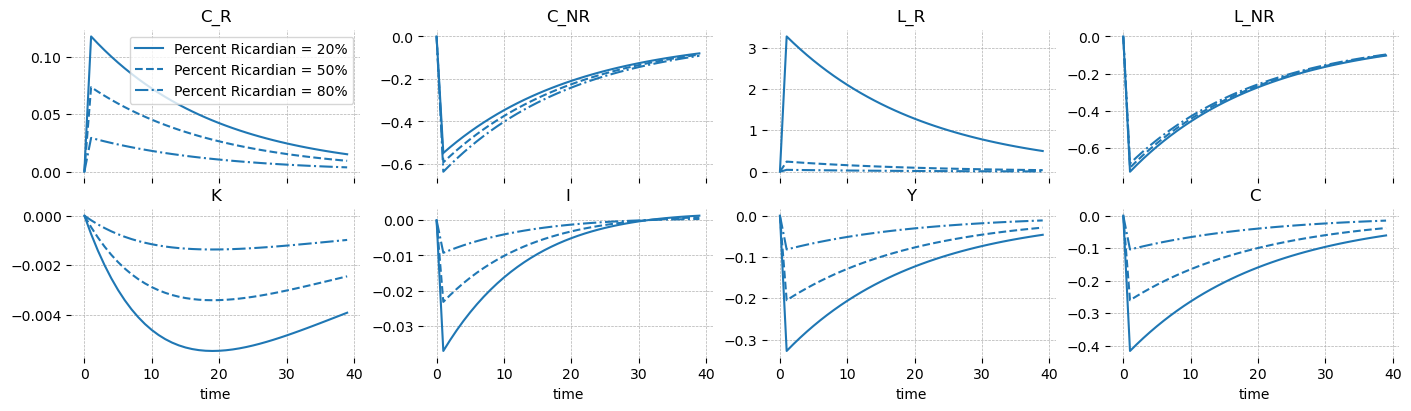

In [12]:
gp.plot_irf(
    {
        f"Percent Ricardian = {omega:0.0%}": ge.impulse_response_function(
            mod,
            shock_size={"epsilon_Theta_N": 1.0},
            verbose=False,
            omega=omega,
            #             steady_state_kwargs={"how": "root", "verbose": False, "progressbar": False},
        )
        for omega in [0.2, 0.5, 0.8]
    },
    ["C_R", "C_NR", "L_R", "L_NR", "K", "I", "Y", "C"],
    figsize=(14, 4),
);

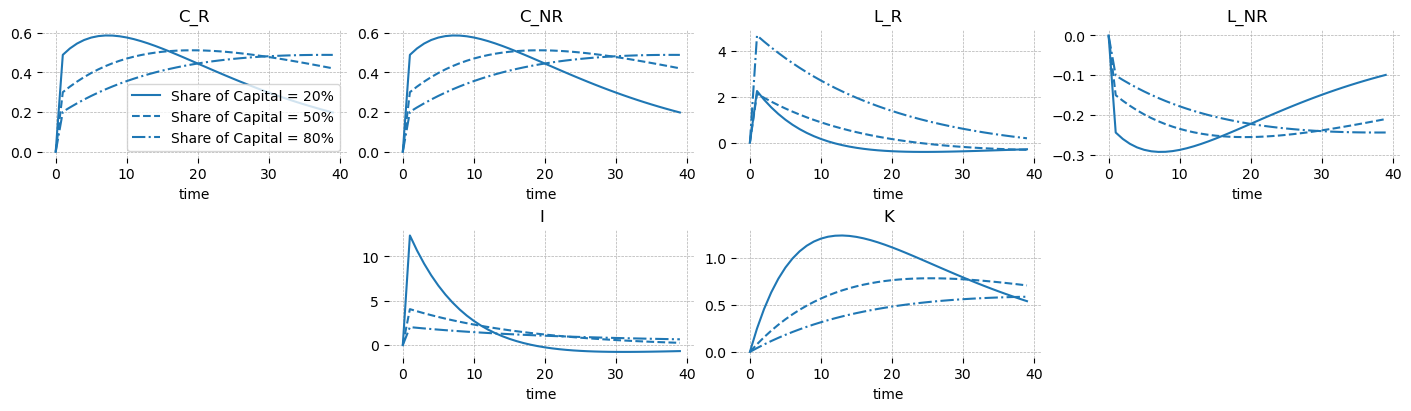

In [13]:
gp.plot_irf(
    {
        f"Share of Capital = {alpha:0.0%}": ge.impulse_response_function(
            mod,
            shock_size={"epsilon_TFP": 1.0},
            verbose=False,
            alpha=alpha,
            #             steady_state_kwargs={"how": "root", "verbose": False, "progressbar": False},
        )
        for alpha in [0.2, 0.5, 0.8]
    },
    ["C_R", "C_NR", "L_R", "L_NR", "I", "K"],
    figsize=(14, 4),
);

In [14]:
ss_mod = ge.statespace_from_gcn(gcn_file)

Model Building Complete.
Found:
	18 equations
	18 variables
		The following variables were eliminated at user request:
			TC_t, U_NR_t, U_R_t
		The following "variables" were defined as constants and have been substituted away:
			mc_t
	4 stochastic shocks
		 0 / 4 has a defined prior. 
	12 parameters
		 12 / 12 parameters has a defined prior. 
	0 parameters to calibrate.
Model appears well defined and ready to proceed to solving.

Statespace model construction complete, but call the .configure method to finalize.


In [15]:
ss_mod.configure(
    observed_states=["Y", "C", "C_R", "L", "L_R", "w"],
    measurement_error=["Y", "C", "C_R", "L", "L_R", "w"],
    full_shock_covaraince=True,
    solver="scan_cycle_reduction",
    mode="JAX",
    max_iter=20,
    use_adjoint_gradients=True,
)

The following parameters should be assigned priors inside a PyMC model block: 
	Theta_N -- shape: (), constraints: None, dims: None
	Theta_R -- shape: (), constraints: None, dims: None
	alpha -- shape: (), constraints: None, dims: None
	beta -- shape: (), constraints: None, dims: None
	delta -- shape: (), constraints: None, dims: None
	omega -- shape: (), constraints: None, dims: None
	rho_TFP -- shape: (), constraints: None, dims: None
	rho_Theta_N -- shape: (), constraints: None, dims: None
	rho_Theta_R -- shape: (), constraints: None, dims: None
	rho_beta_R -- shape: (), constraints: None, dims: None
	sigma_N -- shape: (), constraints: Positive, dims: None
	sigma_R -- shape: (), constraints: Positive, dims: None
	state_cov -- shape: (4, 4), constraints: Positive Semi-Definite, dims: ('shock', 'shock_aux')
	error_sigma_Y -- shape: (), constraints: None, dims: None
	error_sigma_C -- shape: (), constraints: None, dims: None
	error_sigma_C_R -- shape: (), constraints: None, dims: None
	

In [16]:
dates = pd.date_range(start="1980-01-01", end="2024-11-01", freq="QS-OCT")
dummy_data = pd.DataFrame(np.nan, index=dates, columns=ss_mod.observed_states)

all_priors = ss_mod.param_priors | ss_mod.shock_priors

with pm.Model(coords=ss_mod.coords) as pm_mod:
    ss_mod.to_pymc()
    for var_name in ss_mod.error_states:
        x = pz.maxent(pz.Gamma(), lower=0.01, upper=0.05, plot=False)
        all_priors[f"error_sigma_{var_name}"] = x
        x.to_pymc(name=f"error_sigma_{var_name}")

    chol, *_ = pm.LKJCholeskyCov(
        "state_chol", n=4, eta=6, sd_dist=pm.HalfNormal.dist(sigma=0.05)
    )
    cov = pm.Deterministic("state_cov", chol @ chol.T, dims=["shock", "shock_aux"])

    ss_mod.build_statespace_graph(
        dummy_data,
        add_bk_check=False,
        add_solver_success_check=True,
        add_norm_check=True,
        add_steady_state_penalty=True,
    )

    prior = pm.sample_prior_predictive()

/Users/jessegrabowski/mambaforge/envs/grabowski_phd/lib/python3.12/site-packages/pymc_extras/statespace/utils/data_tools.py:159: ImputationWarning: Provided data contains missing values and will be automatically imputed as hidden states during Kalman filtering.
  warnings.warn(impute_message, ImputationWarning)
/var/folders/7b/rzxy96cj0w751_6td3g2yss00000gn/T/ipykernel_85686/1575942835.py:25: UserWarning: The effect of Potentials on other parameters is ignored during prior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  prior = pm.sample_prior_predictive()
Sampling: [Theta_N, Theta_R, alpha, beta, delta, error_sigma_C, error_sigma_C_R, error_sigma_L, error_sigma_L_R, error_sigma_Y, error_sigma_w, obs, omega, rho_TFP, rho_Theta_N, rho_Theta_R, rho_beta_R, sigma_N, sigma_R, state_chol]


In [17]:
prior_trajectories = ss_mod.sample_unconditional_prior(prior)

/Users/jessegrabowski/mambaforge/envs/grabowski_phd/lib/python3.12/site-packages/pytensor/link/jax/linker.py:27: UserWarning: The RandomType SharedVariables [RNG(<Generator(PCG64) at 0x349D233E0>)] will not be used in the compiled JAX graph. Instead a copy will be used.
  warnings.warn(
Sampling: [prior_combined]


Output()

In [18]:
idx = np.random.choice(prior.prior.coords["draw"].values)

true_params = prior.prior.isel(chain=0, draw=idx)
data = prior_trajectories.isel(chain=0, draw=idx).prior_observed
data = (
    data.to_dataframe()
    .drop(columns=["chain", "draw"])
    .unstack("observed_state")
    .droplevel(axis=1, level=0)
)

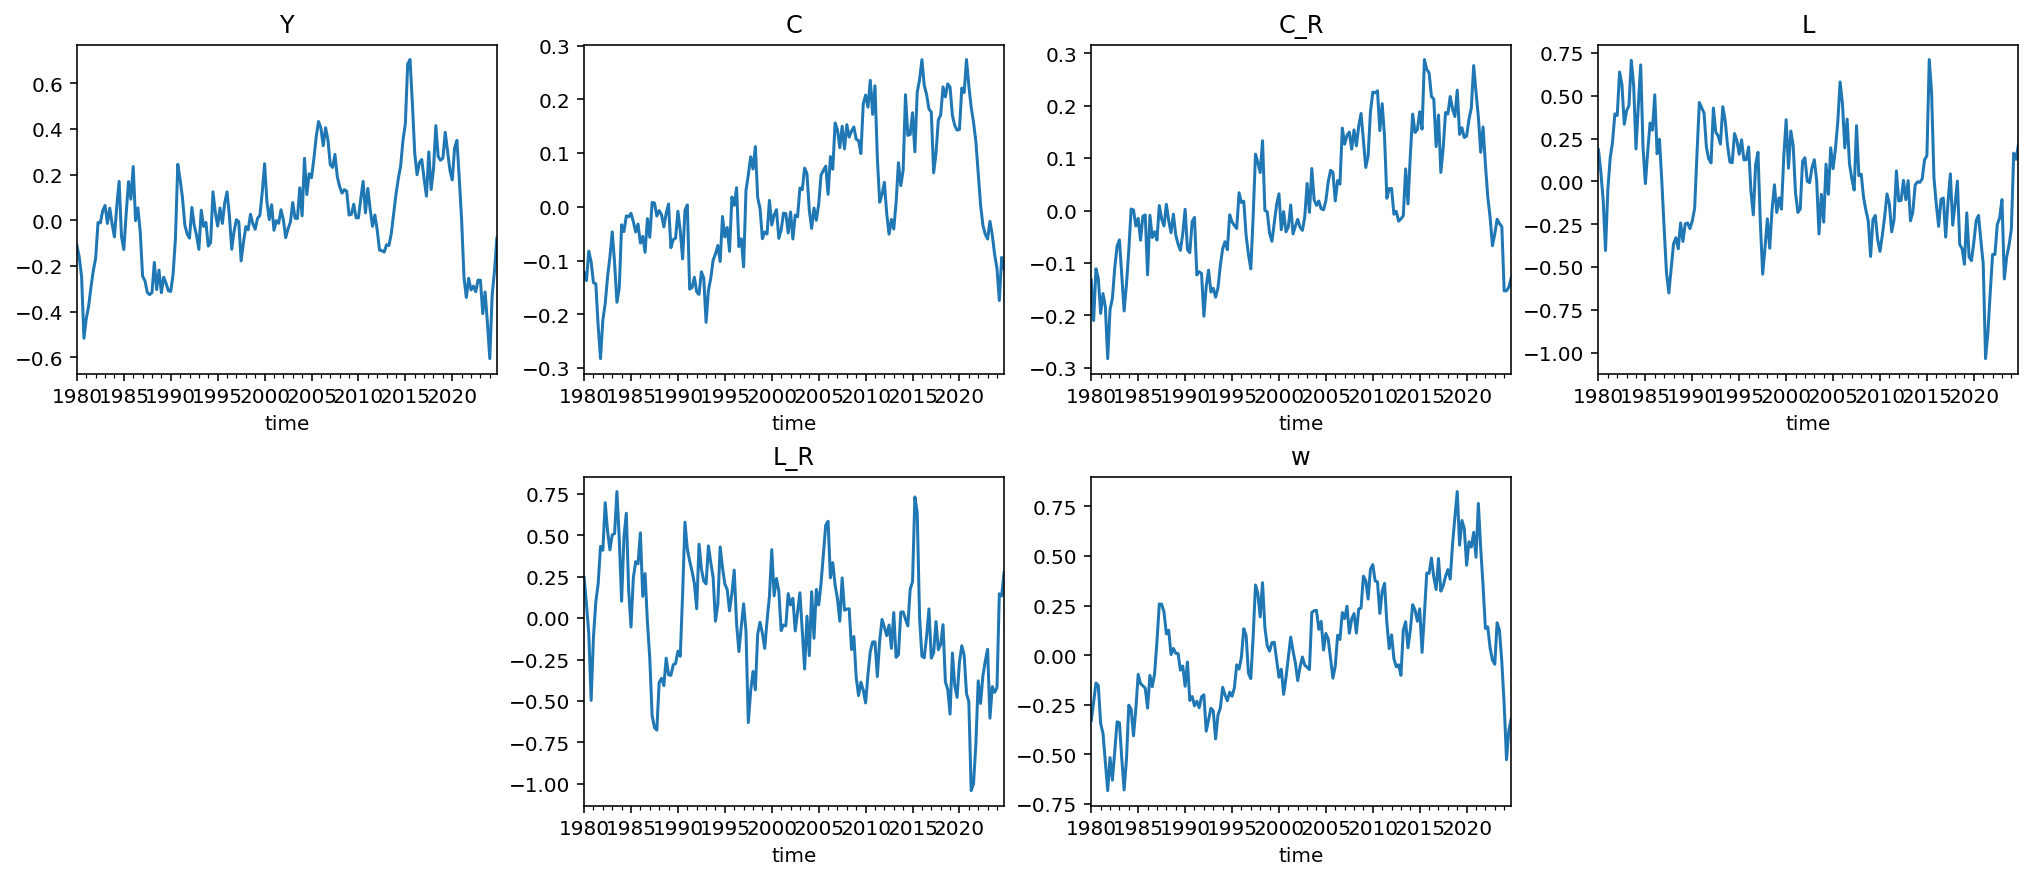

In [19]:
fig = plt.figure(figsize=(14, 6), dpi=144, layout="constrained")
gs, locs = gp.prepare_gridspec_figure(
    n_plots=len(ss_mod.observed_states), n_cols=4, figure=fig
)
for loc, col in zip(locs, data):
    axis = fig.add_subplot(gs[loc])
    data[col].plot(ax=axis, legend=False, title=col)

In [20]:
with pm_mod:
    pm.set_data({"data": data})
    ss_mod._fit_data = data

In [21]:
from pymc.model.transform.optimization import freeze_dims_and_data
import nutpie as ntp

ntp_mod = ntp.compile_pymc_model(
    freeze_dims_and_data(pm_mod),
    backend="jax",
    gradient_backend="jax",
    default_initialization_strategy="prior",
    jitter_rvs=set(),
    initial_points=None,
)

In [32]:
idata = ntp.sample(
    ntp_mod.with_transform_adapt(
        verbose=True,
        learning_rate=5e-3,
        num_layers=5,
        nn_width=32,
        batch_size=256,
        initial_skip=256,
        zero_init=False,
        dct_layer=True,
        extend_dct=True,
    ),
    tune=1000,
    draws=500,
    chains=6,
    transform_adapt=True,
)

Progress,Draws,Divergences,Step Size,Gradients/Draw
,1500,0,0.51,7
,1500,1,0.53,7
,1500,0,0.41,7
,1500,1,0.44,7
,1500,1,0.46,7
,1500,0,0.51,7


Chain 3: Total available points: 11
loss from diag: 4.915059782522031
Chain 5: Total available points: 11
loss from diag: 4.9034272332449875
Chain 1: Total available points: 11
loss from diag: 2.2079419389683825
Chain 3: Total available points: 21
loss from diag: 4.225615729774014
Chain 0: Total available points: 11
loss from diag: 6.667217240153926
Chain 4: Total available points: 11
loss from diag: 4.7121360053536465
Chain 5: Total available points: 21
loss from diag: 1.7047178260634106
Chain 4: Total available points: 21
loss from diag: 1.6440593256988207
Chain 1: Total available points: 21
loss from diag: 0.1251573988000948
Chain 2: Total available points: 11
loss from diag: 5.852848635131124
Chain 3: Total available points: 31
loss from diag: 2.998853995196222
Chain 4: Total available points: 31
loss from diag: 1.5416513733189907
Chain 1: Total available points: 31
loss from diag: 1.2127682051587276
Chain 5: Total available points: 31
loss from diag: 2.495685102624413
Chain 4: Tot

Chain 0: New loss 2.8850733529210677, old loss 3.3796639223338567
Chain 4: New loss 2.260249533396545, old loss 2.804154720958539
Chain 3: Total available points: 501
Chain 1: Total available points: 451
Chain 3: New loss 2.0821306158179684, old loss 2.5630584719768974
Chain 2: Total available points: 351
Chain 1: New loss 1.657978931210631, old loss 2.629466473636738
Chain 5: Total available points: 551
Chain 2: New loss 1.821294567938861, old loss 4.079788533864382
Chain 5: New loss 1.5276270272725916, old loss 2.0823552352278476
Chain 4: Total available points: 451
Chain 3: Total available points: 551
Chain 4: New loss 1.7753727886804693, old loss 2.7277314117184868
Chain 0: Total available points: 401
Extending flow...
4.111867351016713 [1.16226551 0.57479701 0.78863875 0.99187412 0.93582853 0.46976973
 0.96137946 0.3819604  0.24332573 0.93831992 0.83303598 0.96701911
 0.52957288 0.23208566 0.5735607  0.40967349 0.38581643 0.47402644
 0.30212344 4.11186735 1.34105782 0.93711177 1.0

0.4138899989119618 [0.14887331 0.2295935  0.19063601 0.20611702 0.41389    0.19904067
 0.2348498  0.29596662 0.17077541 0.17875241 0.16141873 0.17411345
 0.24492406 0.18921554 0.23833007 0.18587827 0.19331268 0.18579627
 0.17784763 0.15206328 0.2633016  0.18657427 0.23443311 0.20473067
 0.17392598 0.17838618 0.1739155  0.12742771]
dct: True
Chain 3: New loss 1.190917538579354, old loss 1.9009365090003012
Chain 4: New loss 1.1135839520269144, old loss 1.7355022827357485
Chain 0: New loss 1.4626900925209085, old loss 1.992470814081948
Chain 2: New loss 0.9749642207253414, old loss 2.1800500509581298
Chain 1: New loss 0.11901014318547982, old loss 1.8361089623994367
Chain 3: Total available points: 851
Chain 0: Total available points: 751
Chain 0: New loss 1.415688419020741, old loss 1.7659323448299313
Chain 4: Total available points: 851
Chain 3: New loss 0.8226621415820424, old loss 1.544775031879382
Chain 1: Total available points: 851
Chain 4: New loss 1.114410976704217, old loss 1.92

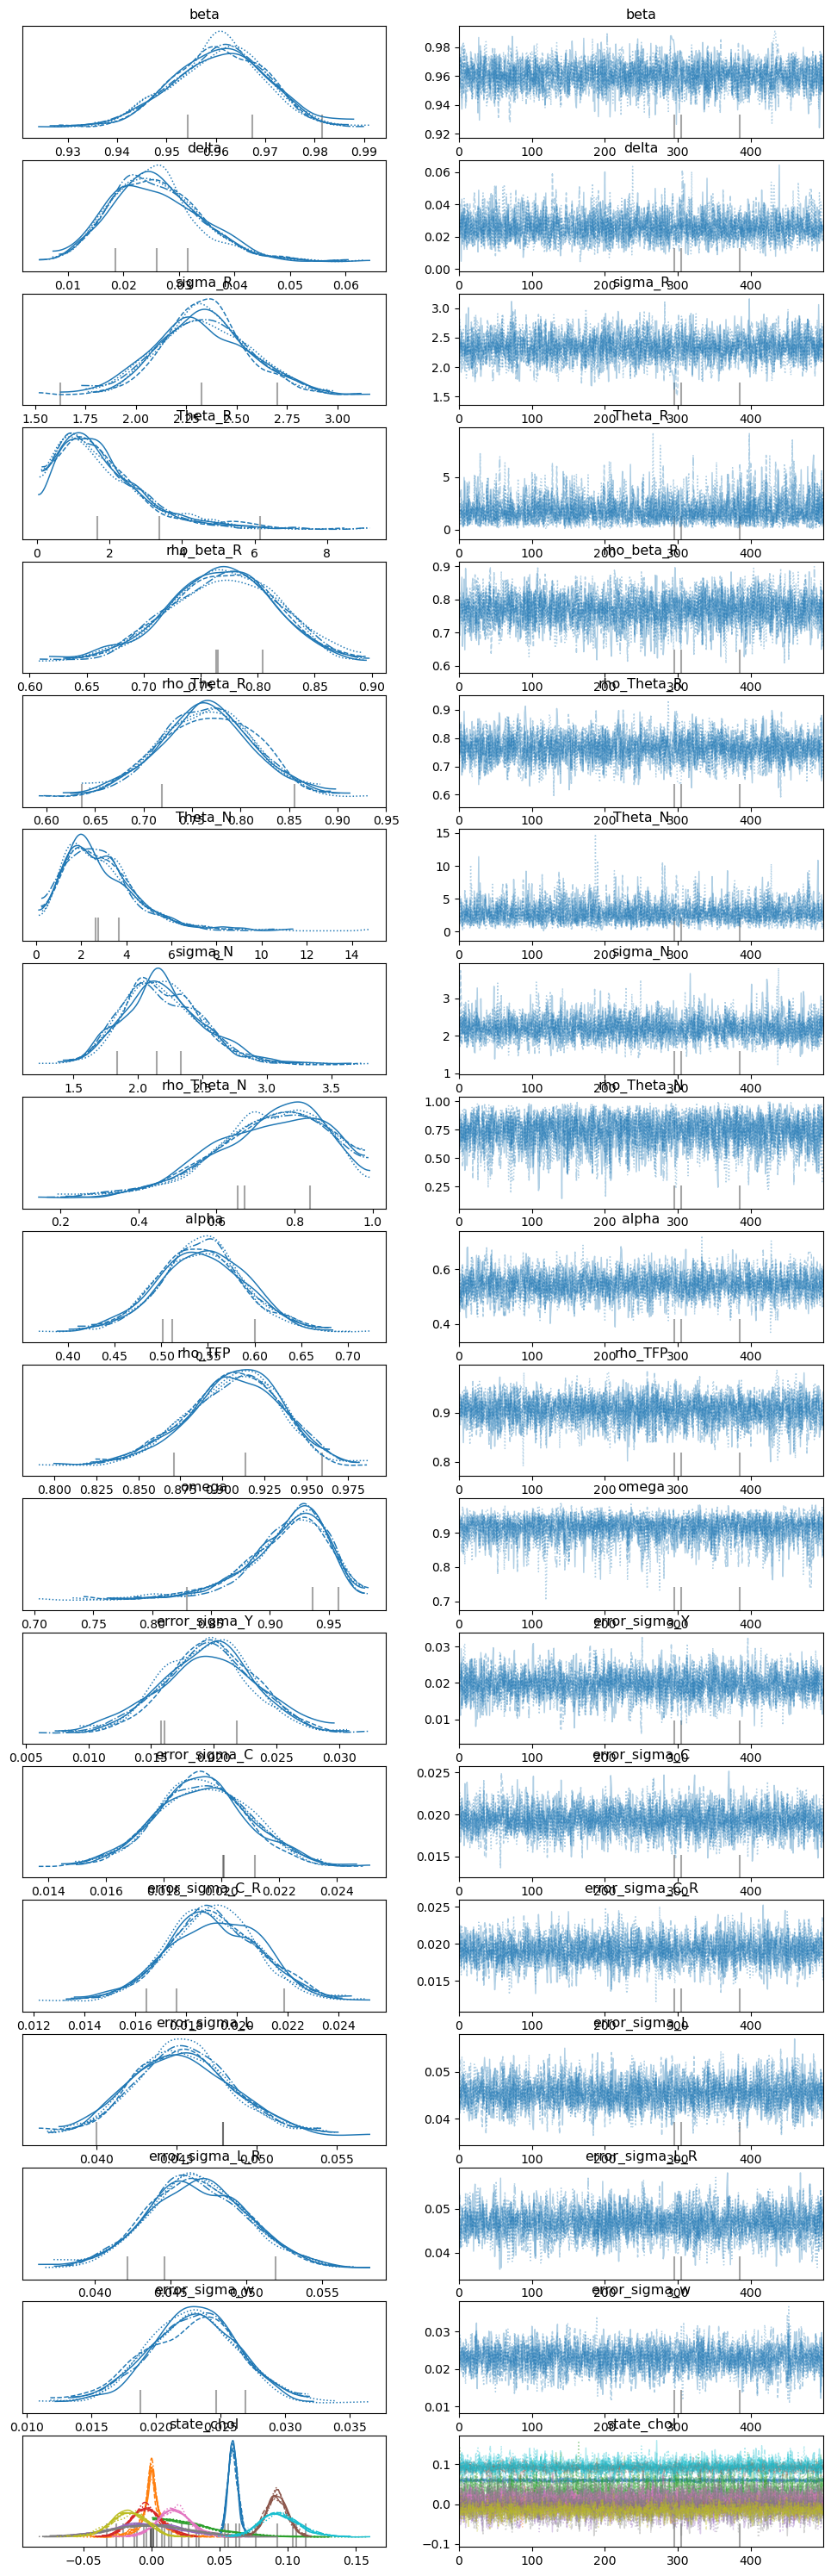

In [33]:
import arviz as az

var_names = [rv.name for rv in pm_mod.free_RVs]
az.plot_trace(idata, var_names=var_names);

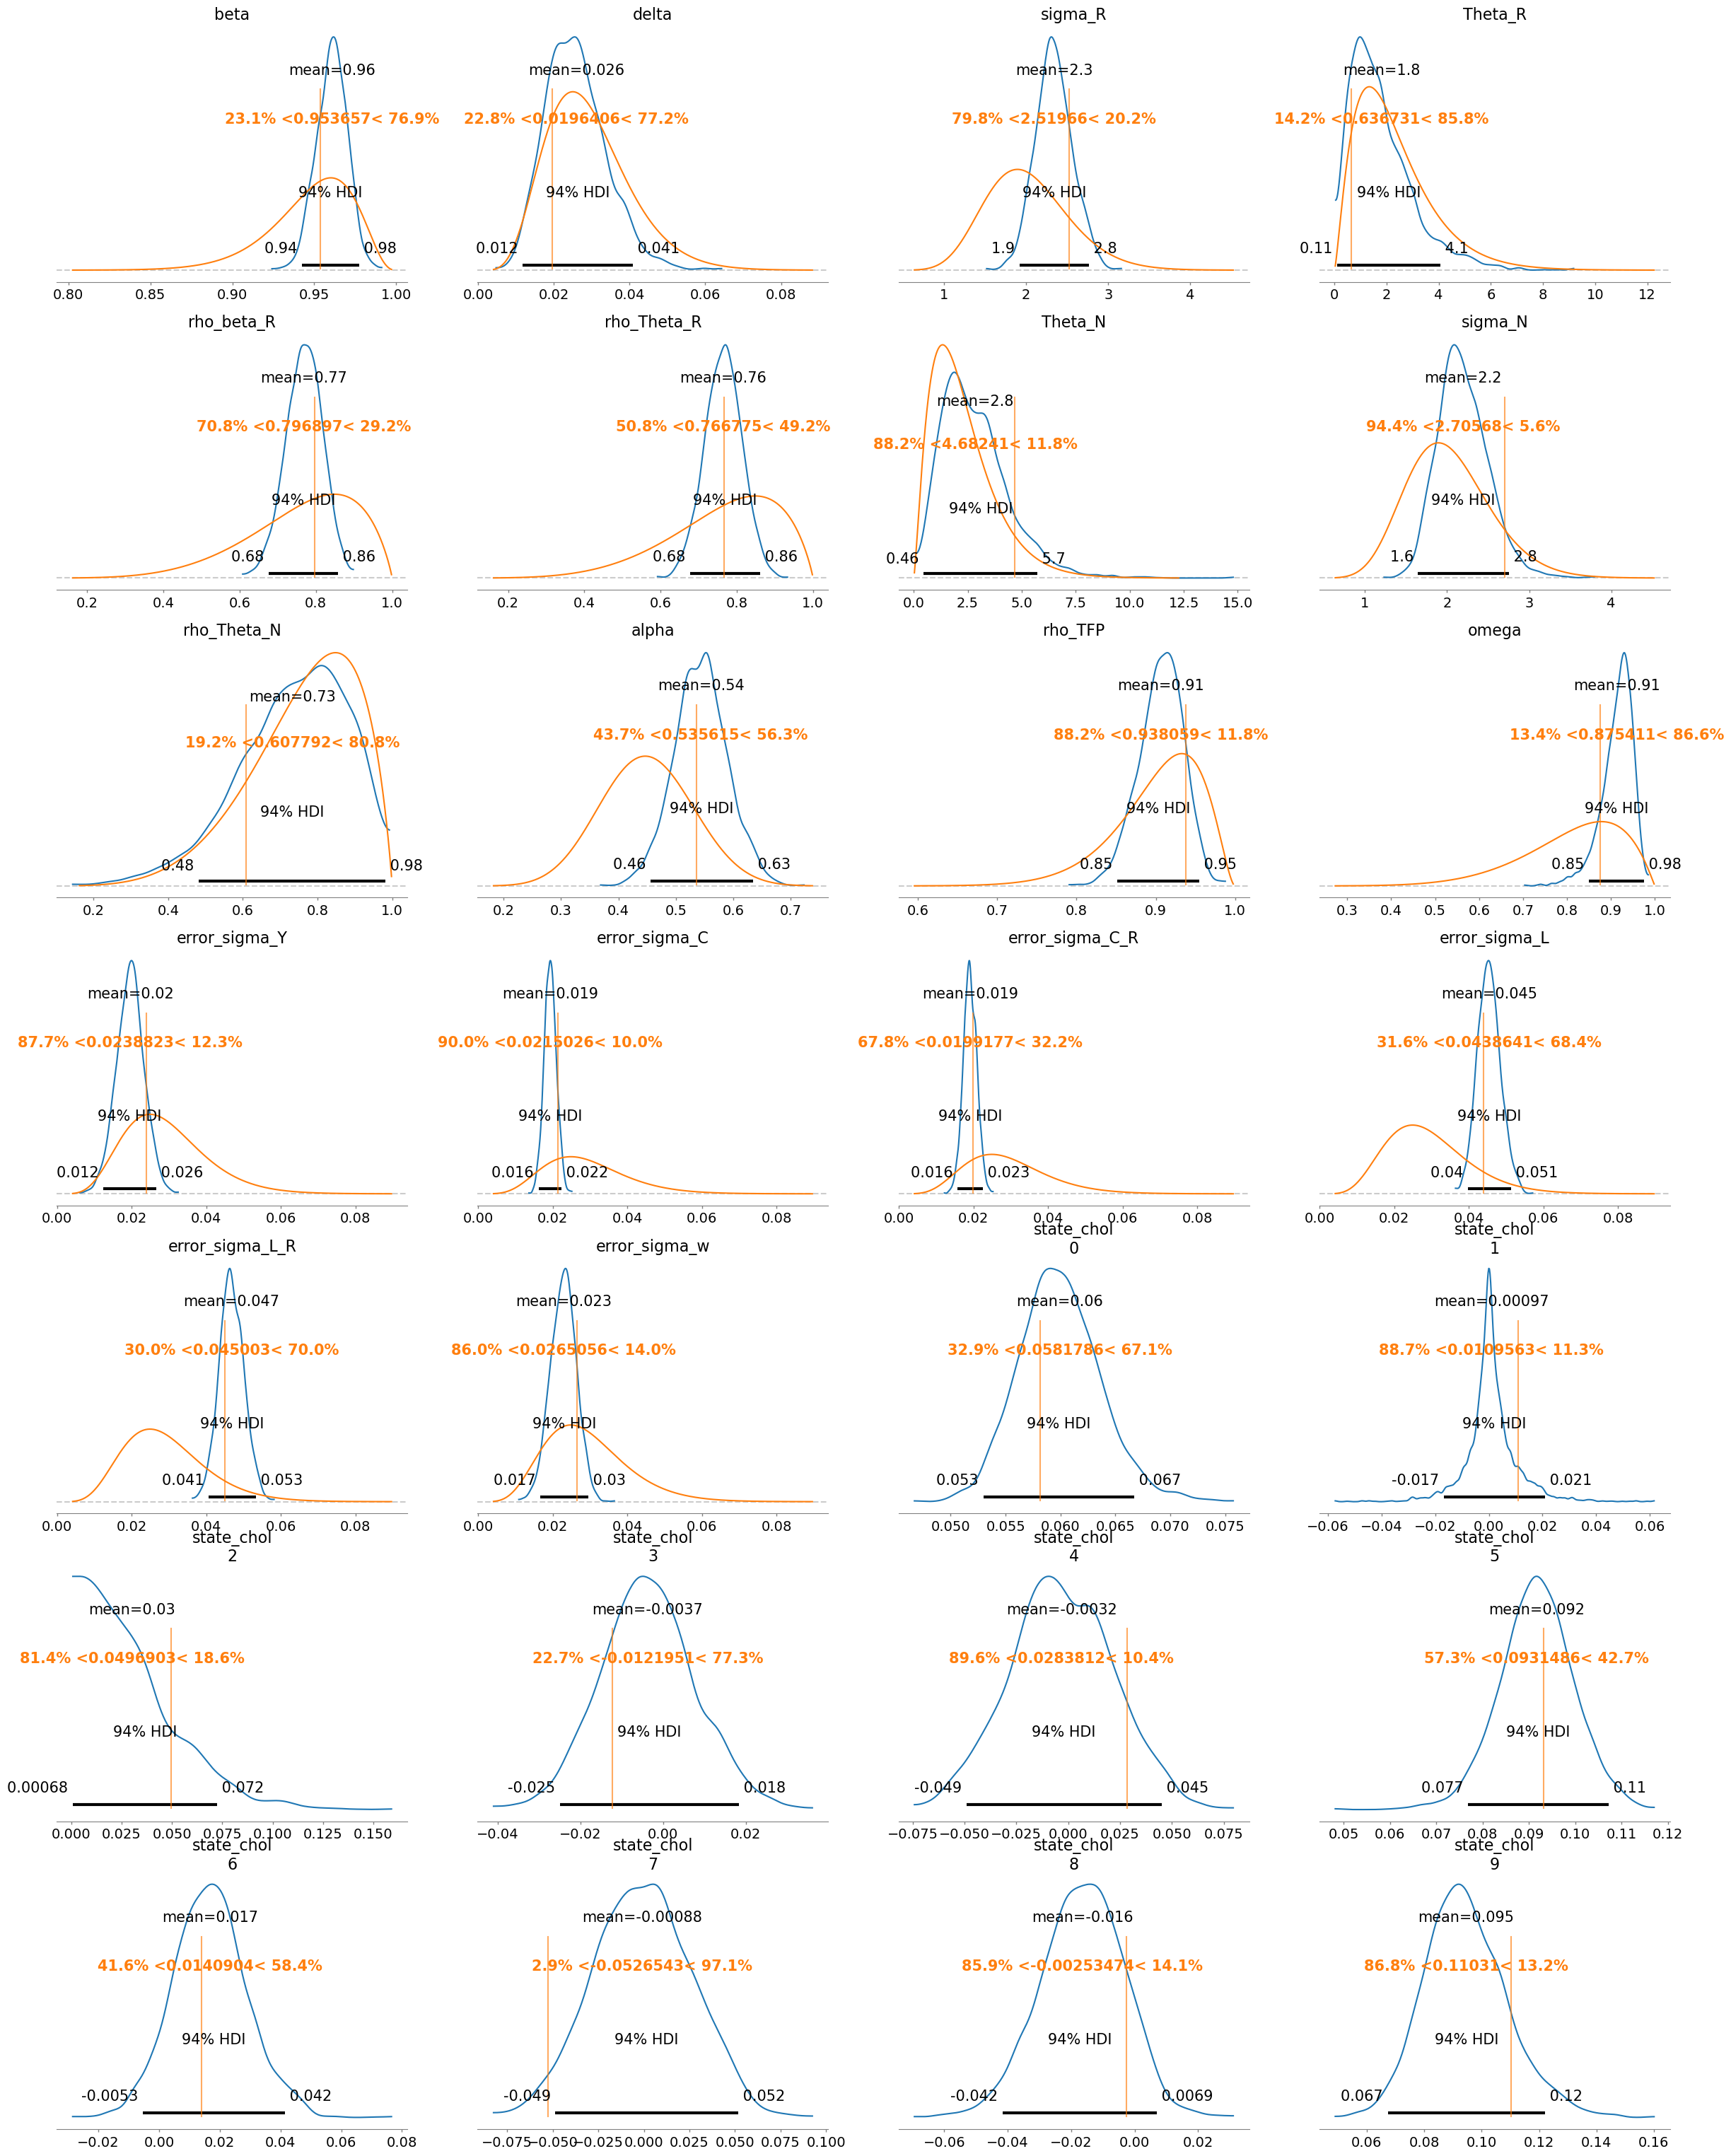

In [34]:
axes = az.plot_posterior(
    idata,
    var_names=var_names,
    ref_val=np.r_[*[true_params[name].values.ravel() for name in var_names]].tolist(),
)
for axis in axes.ravel():
    var_name, *coords = axis.get_title().split("\n")

    if var_name in all_priors:
        all_priors[var_name].plot_pdf(ax=axis, legend=False, color="tab:orange")